<font color='green'> Tips: Please name the two dataset 'Spotify_2021_weekly.csv','Billboard_2021_weekly.csv' and put them in the same folder with this Jupyter Notebook. <font>

## Music Popularity Across Platforms: United States' Spotify Charts vs. Billboard Hot 100

## Part 1. Collecting Data

To answer our research question, we need to collect data on the top songs in USA shown on Spotify and the Billboard Top 100, including information surrounding the artist's name, song title, place in the top 100, and the number of weeks the song has spent on a music chart.

### 1.1. Create a Dataset from Weekly Spotify Charts

1) Download the weekly charts

To compile a comprehensive dataset for our analysis, we downloaded top 200 weekly charts spanning all 52 weeks of 2021 from the Spotify Charts website (https://charts.spotify.com/charts/overview/us), which archives weekly charts from various countries.

2) Combine weekly chart data and enrich the dataset

In [16]:
import os
import pandas as pd

3) Define the columns we need for the weekly dataset

In [17]:
col_weekly = ['rank', 'uri', 'artist_names','track_name',
              'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams', 'date',
              'country']

4) Function to Combine Data from Multiple CSV Files, Add New Columns, and Extract Top 100 Songs

In [18]:
def weekly_concat(directory):
    # Initialize an empty DataFrame with the specified columns
    df = pd.DataFrame(columns=col_weekly)

    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)

        # checking if it is a file
        if os.path.isfile(f):
            # Read the first 100 rows from each CSV file
            df_week = pd.read_csv(f, nrows=100)
            # Extract the date from the filename
            date = f[-14:-4]
            # Add 'date' and 'country' columns to the DataFrame
            df_week['date'] = date
            df_week['country'] = country
            df = pd.concat([df, df_week], ignore_index=True) 

    df.to_csv('Spotify_2021_us.csv', index=False) 

    return None

5) Specify the directory containing CSV files and set the country

In [19]:
directory = 'Dataset_US'
country = 'US'

6) Call the function with the specified directory

In [ ]:
weekly_concat('CD_data/Spotify_2021_weekly/Dataset_US')

**Now, our dataset encompasses the weekly Spotify charts with the following columns: 'rank', 'uri', 'artist_names', 'track_name', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams', 'date', and 'country'.**

### 1.2. Extract the dataset from Weekly Billboard Charts

Every week, Billboard releases "The Hot 100" chart of songs that were trending on sales and airplay for that week.  
We discovered a dataset related to Billboard top charts on Kaggle (https://www.kaggle.com/datasets/dhruvildave/billboard-the-hot-100-songs/data). This dataset encompasses all "The Hot 100" charts released since its initiation in 1958.   
For our project, we extracted the data corresponding to the 52 weeks of 2021 in Excel.

**Then, this dataset includes the weekly Billboard charts with the following columns: 'date', 'rank', 'song', 'artist', 'last-week', 'peak-rank', and 'weeks-on-board'.**

## Part 2. Import and Clean the Dataset

1) Import the dataset

In [105]:
spotify_df = pd.read_csv(''path_to_Spotify_2021_weekly.csv'', delimiter=",", encoding = 'utf-8')
billboard_df = pd.read_csv(''path_to_Billdoard_2021_weekly.csv'', delimiter=",", encoding = 'utf-8')

Let's see how they look so far!

In [106]:
spotify_df.sample(10)

,rank,uri,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams,date,country,source
2486,87,spotify:track:2ZXxRC6V6AXzMdbLQZMHSB,Lil Tecca,LOT OF ME,65,67,5,2032177,2021/10/21,US,Galactic / Republic Records
40,41,spotify:track:5JCoSi02qi3jJeHdZXMmR8,Olivia Rodrigo,favorite crime,5,32,14,2880816,2021/8/26,US,Olivia Rodrigo PS
861,62,spotify:track:15EH2glphTjcarRjAsc0EB,Migos,Straightenin,30,32,6,2522383,2021/6/24,US,Quality Control Music/Motown Records
1350,51,spotify:track:4qu63nuBpdn0qHUHuObEj1,"Marshmello, Jonas Brothers",Leave Before You Love Me (with Jonas Brothers),45,45,8,2744901,2021/7/15,US,Republic Records
1530,31,spotify:track:7kDUspsoYfLkWnZR7qwHZl,"Machine Gun Kelly, blackbear",my ex's best friend (with blackbear),11,27,29,2942533,2021/2/25,US,Bad Boy/Interscope Records
1092,93,spotify:track:3K07bGe8iljQ3mOKArHLDo,Chris Stapleton,Starting Over,43,-1,10,1963963,2021/4/22,US,Mercury Nashville
4716,17,spotify:track:2WnAKZefdRHxtBEkRjFOHC,Justin Bieber,Anyone,2,49,12,5139401,2021/3/25,US,RBMG/Def Jam
3137,38,spotify:track:38Vh0iUlilcvnBNWS4saSD,Juice WRLD,Doom,38,-1,1,3941416,2021/12/16,US,Grade A Productions/Interscope Records
4802,3,spotify:track:5CZ40GBx1sQ9agT82CLQCT,Olivia Rodrigo,traitor,3,3,3,9997883,2021/6/10,US,Olivia Rodrigo PS
3631,32,spotify:track:3DarAbFujv6eYNliUTyqtz,"Doja Cat, SZA",Kiss Me More (feat. SZA),1,19,22,5795297,2021/9/9,US,Kemosabe Records/RCA Records


In [107]:
billboard_df.sample(10)

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
2689,2021/5/8,90,Arcade,Duncan Laurence,94.0,90,3
2663,2021/5/8,64,Come Through,H.E.R. Featuring Chris Brown,NaN,64,1
3419,2021/3/13,20,Good Time,Niko Moon,25.0,20,22
2631,2021/5/8,32,Therefore I Am,Billie Eilish,30.0,2,25
2528,2021/5/15,29,34+35,Ariana Grande,27.0,2,27
2542,2021/5/15,43,I Did It,"DJ Khaled Featuring Post Malone, Megan Thee St...",NaN,43,1
2846,2021/4/24,47,Wants And Needs,Drake Featuring Lil Baby,38.0,2,6
2236,2021/6/5,37,Heat Waves,Glass Animals,42.0,33,19
849,2021/9/11,50,If I Didn't Love You,Jason Aldean & Carrie Underwood,44.0,15,6
1545,2021/7/24,46,Wockesha,Moneybagg Yo,37.0,33,12


2) Rename the columns so the two datasets match

In [108]:
spotify_df.rename(columns={'artist_names':'artist','track_name':'song','weeks_on_chart':'weeks_on_charts'},inplace= True)
billboard_df.rename(columns={'peak-rank':'peak_rank','weeks-on-board':'weeks_on_charts'},inplace=True)

3) Drop columns that won't be analysed

In [109]:
spotify_df.drop(columns=['uri','country','source','previous_rank'],axis=1, inplace=True)
billboard_df.drop(columns=['last-week'],axis=1, inplace=True)

4) Change the order of the columns

In [110]:
list_spotify = ['song','artist','date','rank','weeks_on_charts','peak_rank','streams']
list_billboard = ['song','artist','date','rank','weeks_on_charts','peak_rank']

In [111]:
spotify_df = spotify_df[list_spotify]
billboard_df = billboard_df[list_billboard]

In [112]:
spotify_df.head(10)

,song,artist,date,rank,weeks_on_charts,peak_rank,streams
0,STAY (with Justin Bieber),"The Kid LAROI, Justin Bieber",2021/8/26,1,7,1,13698566
1,INDUSTRY BABY (feat. Jack Harlow),"Lil Nas X, Jack Harlow",2021/8/26,2,5,1,11031868
2,good 4 u,Olivia Rodrigo,2021/8/26,3,15,1,8219210
3,Need to Know,Doja Cat,2021/8/26,4,11,4,8200497
4,Happier Than Ever,Billie Eilish,2021/8/26,5,4,3,7137596
5,Kiss Me More (feat. SZA),"Doja Cat, SZA",2021/8/26,6,20,1,6681635
6,Bad Habits,Ed Sheeran,2021/8/26,7,9,7,5527199
7,2055,Sleepy Hallow,2021/8/26,8,10,8,5421722
8,Heat Waves,Glass Animals,2021/8/26,9,39,9,5257889
9,MONTERO (Call Me By Your Name),Lil Nas X,2021/8/26,10,22,1,5235498


In [113]:
billboard_df.head(10)

,song,artist,date,rank,weeks_on_charts,peak_rank
0,Easy On Me,Adele,2021/11/6,1,3,1
1,Stay,The Kid LAROI & Justin Bieber,2021/11/6,2,16,1
2,Industry Baby,Lil Nas X & Jack Harlow,2021/11/6,3,14,1
3,Fancy Like,Walker Hayes,2021/11/6,4,19,3
4,Bad Habits,Ed Sheeran,2021/11/6,5,18,2
5,Way 2 Sexy,Drake Featuring Future & Young Thug,2021/11/6,6,8,1
6,Shivers,Ed Sheeran,2021/11/6,7,7,7
7,Good 4 U,Olivia Rodrigo,2021/11/6,8,24,1
8,Need To Know,Doja Cat,2021/11/6,9,20,9
9,Levitating,Dua Lipa,2021/11/6,10,56,2


## Part 3. Data Exploration
### Now that we have our two datasets, it's time to explore!
Let's see what the most popular songs are on Billboard and on Spotify. However, this dataset offers us several measures of popularity. The first way would be to measure by rank, so let's sort the dataset and have a look.

### 3.1 Sorting dataframes
We can create sorted dataframe using the 'sort_values' method. 

In [114]:
billboard_rank_sorted = billboard_df.sort_values(by=['rank'], ascending = True)
spotify_rank_sorted = spotify_df.sort_values(by=['rank'], ascending = True)

In [115]:
billboard_rank_sorted.head(10)

,song,artist,date,rank,weeks_on_charts,peak_rank
0,Easy On Me,Adele,2021/11/6,1,3,1
3500,Drivers License,Olivia Rodrigo,2021/3/6,1,7,1
2800,Rapstar,Polo G,2021/4/24,1,1,1
1500,Permission To Dance,BTS,2021/7/24,1,1,1
1000,Stay,The Kid LAROI & Justin Bieber,2021/8/28,1,6,1
4100,Drivers License,Olivia Rodrigo,2021/1/23,1,1,1
2500,Save Your Tears,The Weeknd & Ariana Grande,2021/5/15,1,21,1
1200,Stay,The Kid LAROI & Justin Bieber,2021/8/14,1,4,1
3300,What's Next,Drake,2021/3/20,1,1,1
2000,Butter,BTS,2021/6/19,1,3,1


In [116]:
spotify_rank_sorted.head(10)

,song,artist,date,rank,weeks_on_charts,peak_rank,streams
0,STAY (with Justin Bieber),"The Kid LAROI, Justin Bieber",2021/8/26,1,7,1,13698566
3900,good 4 u,Olivia Rodrigo,2021/6/3,1,3,1,24777068
1100,Good Days,SZA,2021/1/7,1,2,1,6323585
4000,good 4 u,Olivia Rodrigo,2021/6/17,1,5,1,17136875
1000,RAPSTAR,Polo G,2021/4/22,1,2,1,14135559
4100,STAY (with Justin Bieber),"The Kid LAROI, Justin Bieber",2021/8/12,1,5,1,14059933
4200,What’s Next,Drake,2021/3/18,1,2,1,7904871
900,MONTERO (Call Me By Your Name),Lil Nas X,2021/4/8,1,2,1,14538057
4300,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,2021/11/18,1,1,1,18105602
800,good 4 u,Olivia Rodrigo,2021/6/24,1,6,1,15040107


As you can see, some of the songs are repeated because they have been number one for more than one week. Let's create a dataframe that only contains the number one songs. 

In [117]:
number1_spotify = spotify_rank_sorted[spotify_rank_sorted['rank'] == 1]
number1_billboard = billboard_rank_sorted[billboard_rank_sorted['rank'] == 1]

In [118]:
number1_spotify.head()

,song,artist,date,rank,weeks_on_charts,peak_rank,streams
0,STAY (with Justin Bieber),"The Kid LAROI, Justin Bieber",2021/8/26,1,7,1,13698566
3900,good 4 u,Olivia Rodrigo,2021/6/3,1,3,1,24777068
1100,Good Days,SZA,2021/1/7,1,2,1,6323585
4000,good 4 u,Olivia Rodrigo,2021/6/17,1,5,1,17136875
1000,RAPSTAR,Polo G,2021/4/22,1,2,1,14135559


In [119]:
number1_billboard.head()

,song,artist,date,rank,weeks_on_charts,peak_rank
0,Easy On Me,Adele,2021/11/6,1,3,1
3500,Drivers License,Olivia Rodrigo,2021/3/6,1,7,1
2800,Rapstar,Polo G,2021/4/24,1,1,1
1500,Permission To Dance,BTS,2021/7/24,1,1,1
1000,Stay,The Kid LAROI & Justin Bieber,2021/8/28,1,6,1


Now, let's sort by the number of weeks that songs have been on the chart to see this measure of popularity.

In [120]:
billboard_weeks_sorted = billboard_df.sort_values(by=['weeks_on_charts'], ascending = False)
spotify_weeks_sorted = spotify_df.sort_values(by=['weeks_on_charts'], ascending = False)

In [121]:
billboard_weeks_sorted.head()

,song,artist,date,rank,weeks_on_charts,peak_rank
919,Blinding Lights,The Weeknd,2021/9/4,20,90,1
1020,Blinding Lights,The Weeknd,2021/8/28,21,89,1
1117,Blinding Lights,The Weeknd,2021/8/21,18,88,1
1215,Blinding Lights,The Weeknd,2021/8/14,16,87,1
1316,Blinding Lights,The Weeknd,2021/8/7,17,86,1


In [122]:
spotify_weeks_sorted.head()

,song,artist,date,rank,weeks_on_charts,peak_rank,streams
286,goosebumps,Travis Scott,2021/11/11,87,254,8,1980463
1888,goosebumps,Travis Scott,2021/5/13,89,228,8,2009272
2098,goosebumps,Travis Scott,2021/5/6,99,227,8,1941338
5192,goosebumps,Travis Scott,2021/4/29,93,226,8,1938945
1094,goosebumps,Travis Scott,2021/4/22,95,225,8,1956547


As you can see, there are multiple data points for one song. In order to clean this up, we can take the first value that contains the highest value for weeks on chart. 

In [123]:
billboard_weeks_sorted = billboard_weeks_sorted.drop_duplicates(subset='song')
spotify_weeks_sorted = spotify_weeks_sorted.drop_duplicates(subset = 'song')

In [124]:
billboard_weeks_sorted.head(10)

,song,artist,date,rank,weeks_on_charts,peak_rank
919,Blinding Lights,The Weeknd,2021/9/4,20,90,1
3423,I Hope,Gabby Barrett Featuring Charlie Puth,2021/3/13,24,62,3
9,Levitating,Dua Lipa,2021/11/6,10,56,2
1141,My Ex's Best Friend,Machine Gun Kelly X blackbear,2021/8/21,42,52,20
3632,Before You Go,Lewis Capaldi,2021/2/27,33,52,9
2527,Go Crazy,Chris Brown & Young Thug,2021/5/15,28,52,3
1247,Mood,24kGoldn Featuring iann dior,2021/8/14,48,52,1
3848,Whats Poppin,"Jack Harlow Featuring DaBaby, Tory Lanez & Lil...",2021/2/13,49,51,2
16,Save Your Tears,The Weeknd & Ariana Grande,2021/11/6,17,46,1
840,Forever After All,Luke Combs,2021/9/11,41,45,2


In [125]:
spotify_weeks_sorted.head(10)

,song,artist,date,rank,weeks_on_charts,peak_rank,streams
286,goosebumps,Travis Scott,2021/11/11,87,254,8,1980463
2375,No Role Modelz,J. Cole,2021/12/30,76,203,43,2499404
2396,Lucid Dreams,Juice WRLD,2021/12/30,97,191,1,2215742
4286,Jocelyn Flores,XXXTENTACION,2021/3/18,87,186,3,2006269
285,All Girls Are The Same,Juice WRLD,2021/11/11,86,185,13,1984932
2386,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2021/12/30,87,167,1,2323566
4295,SLOW DANCING IN THE DARK,Joji,2021/3/18,96,130,29,1944030
4899,Robbery,Juice WRLD,2021/6/10,100,121,3,1923120
3577,MIDDLE CHILD,J. Cole,2021/5/20,78,120,1,2261419
280,Circles,Post Malone,2021/11/11,81,115,1,2072990


What similarities and differences do you notice between songs and the weeks on the chart between the two datasets at first glance?

### 3.2 Descriptive Statistics
To get a more general overview of what exists in the data, we can also use the describe() function to explore our data. 

In [126]:
spotify_weeks_sorted.describe()

,rank,weeks_on_charts,peak_rank,streams
count,770.000000,770.000000,770.000000,7.700000e+02
mean,71.383117,13.677922,37.374026,2.619487e+06
std,24.580749,24.905599,28.764690,9.176311e+05
min,1.000000,1.000000,1.000000,1.783609e+06
25%,55.000000,1.000000,12.000000,2.018215e+06
50%,79.000000,4.000000,32.000000,2.296956e+06
75%,92.000000,17.000000,59.000000,2.838542e+06
max,100.000000,254.000000,100.000000,8.608916e+06


In [127]:
billboard_weeks_sorted.describe()

,rank,weeks_on_charts,peak_rank
count,664.000000,664.000000,664.000000
mean,69.871988,8.980422,47.295181
std,24.926804,11.032158,29.736351
min,1.000000,1.000000,1.000000
25%,50.000000,1.000000,20.000000
50%,77.000000,4.000000,48.000000
75%,91.000000,15.000000,71.250000
max,100.000000,90.000000,100.000000


For the Billboard top songs, it seems that songs are on the charts for less weeks at a time, while for Spotify a song will be more popular longer. The Billboard mean for weeks a song is on the chart is 8.98, whereas on spotify it is 13.68 (about 4 weeks longer!). Additionally, the Billboard range is from 1 week to 90 weeks and the Spotify range for weeks on chart is up to 254 weeks. 

## Part 4. Visulazations

### 4.2 Differences on Artist Preference
To get a more general overview of what exists in the data, we will visualize differences in artist preferences on Spotify and Billboard.

In [128]:
pip install pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [340]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [314]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for nicer plots and make the colours more readable for colorblind people that may read the tutorial
sns.set(style="whitegrid")
sns.set_palette("colorblind", n_colors=10) 

#### Preprocess data

In [329]:
# Convert 'date' column to datetime
spotify_data['date'] = pd.to_datetime(spotify_data['date'])
billboard_data['date'] = pd.to_datetime(billboard_data['date'])

# Merge the datasets
combined_df = pd.merge(spotify_artist_stats, billboard_artist_stats, 
                         left_on='artist_names', right_on='artist')

# Rename columns for clarity
combined_df.rename(columns={'rank_x': 'Spotify_Avg_Rank', 'rank_y': 'Billboard_Avg_Rank',
                              'streams': 'Spotify_Total_Streams', 
                              'weeks-on-board': 'Billboard_Total_Weeks'}, inplace=True)

#### 1. Create a Scatter Plot to Compare Average Ranks on Spotify and Billboard

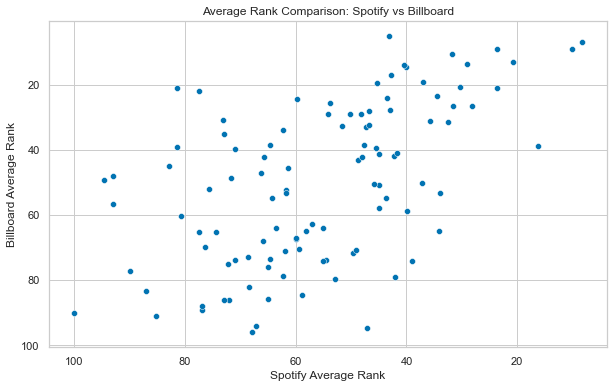

In [336]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='Spotify_Avg_Rank', y='Billboard_Avg_Rank')
plt.title('Average Rank Comparison: Spotify vs Billboard')
plt.xlabel('Spotify Average Rank')
plt.ylabel('Billboard Average Rank')
plt.gca().invert_xaxis() # Inverts the X-axis for better visualization
plt.gca().invert_yaxis() # Inverts the Y-axis for better visualization
plt.show()

In the scatter plot, each point represents an artist. The position of the point is determined by the artist's average rank on Spotify and Billboard. Points closer to the bottom right corner indicate artists who have a high average rank (lower numerical value, which is better) on both platforms. From the scatter plot, we can observe that there is a spread of points across the plot, but there doesn't seem to be a clear, strong correlation between Spotify and Billboard rankings. While there are a few points towards the bottom right, suggesting some artists rank highly on both platforms, the majority of the points are scattered, indicating variability in how artists are ranked between Spotify and Billboard.

#### 2. Create an Interactive Scatter Plot Using Plotly

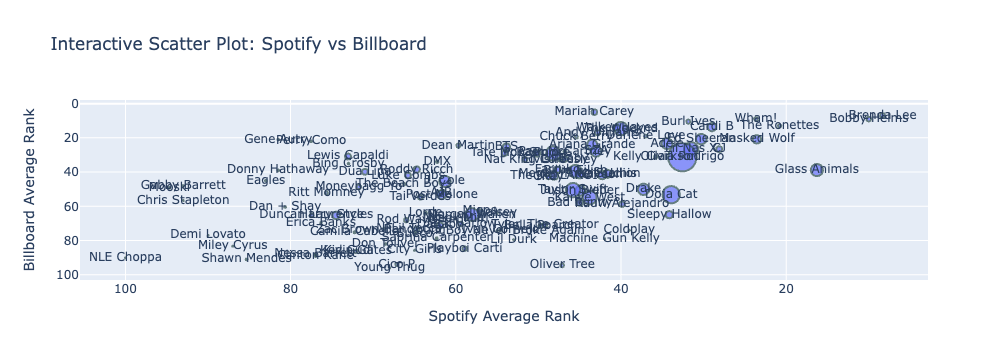

In [338]:
import plotly.express as px

fig = px.scatter(combined_df, x='Spotify_Avg_Rank', y='Billboard_Avg_Rank', 
                 text='artist_names', size='Spotify_Total_Streams', 
                 hover_data=['Spotify_Total_Streams', 'Billboard_Total_Weeks'],
                 title='Interactive Scatter Plot: Spotify vs Billboard')
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(xaxis_title='Spotify Average Rank', yaxis_title='Billboard Average Rank')
fig.update_xaxes(autorange="reversed") # Reverse the axis for better interpretation
fig.update_yaxes(autorange="reversed")
fig.show()

The size of the point reflects the total streams of the artist on Spotify. Hovering over a point shows additional information like the artist's name, total streams on Spotify, and total weeks on Billboard. The position of the artist names on the plot indicates their relative ranks on both platforms. For instance, artists like Mariah Carey and Glass Animals, which appear closer to the bottom right corner, likely have a high average rank (better performance) on both Spotify and Billboard. Some artist with a high Billboard rank but a low Spotify rank might be indicative of a release that is popular in sales or radio play but not as much on streaming platforms.

#### 3. Create Comparative Histograms for Spotify and Billboard Average Ranks

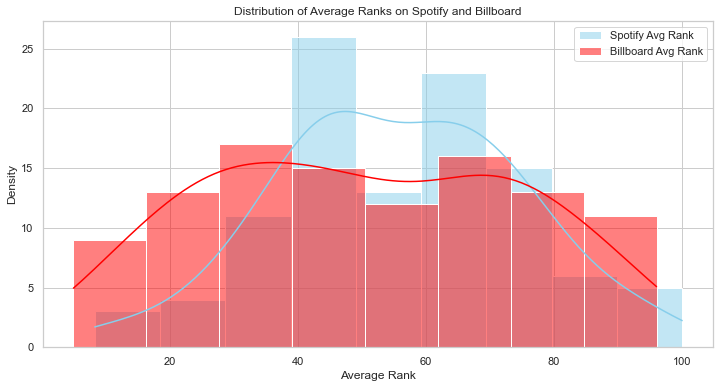

In [339]:
# Comparative Histograms show the distribution of ranks for artists on Spotify and Billboard

plt.figure(figsize=(12, 6))
sns.histplot(combined_df['Spotify_Avg_Rank'], color="skyblue", label="Spotify Avg Rank", kde=True)
sns.histplot(combined_df['Billboard_Avg_Rank'], color="red", label="Billboard Avg Rank", kde=True)
plt.title('Distribution of Average Ranks on Spotify and Billboard')
plt.xlabel('Average Rank')
plt.ylabel('Density')
plt.legend()
plt.show()

The visualizations shows a comparative histogram overlaid with a Kernel Density Estimate (KDE) plot for average ranks on Spotify and Billboard. The colored sky blue one is for Spotify and the colored red one id for Billboard. The sky blue histogram and curve suggest that the Spotify average ranks have a wide distribution with a slight concentration around the 40-60 rank range. The red histogram and curve indicate that the Billboard ranks are also broadly distributed but have a more pronounced peak around the 40-60 rank range. There is a substantial overlap in the middle range of the distributions, suggesting a commonality in the middle ranks between Spotify and Billboard. However, there may be slight differences in the distribution tails, which could indicate variations in how the lower and higher ranked artists compare on both platforms.

#### 4. Create Bar Charts to Compare Top Artists on Spotify and Billboard

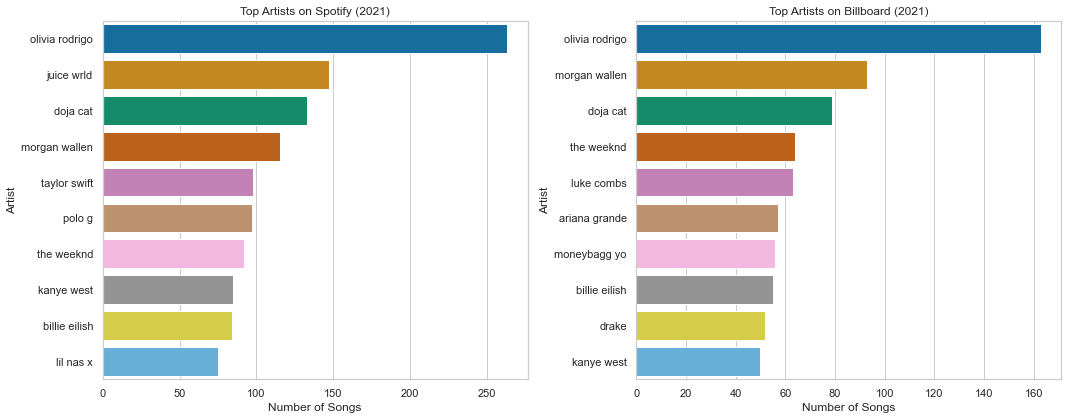

In [351]:
# Determine the top artists on each platform by the number of songs they have.

# Spotify Top Artists
top_artists_spotify = spotify_df['artist'].value_counts().head(10)
# Billboard Top Artists
top_artists_billboard = billboard_df['artist'].value_counts().head(10)

# Create bar charts for visual comparison for Top Performing Artists, compare the number of songs by the top artists on each chart.
# Set the size of the overall figure
plt.figure(figsize=(15, 6))

# Bar chart for Spotify
plt.subplot(1, 2, 1)
sns.barplot(x=top_artists_spotify, y=top_artists_spotify.index)
plt.title('Top Artists on Spotify (2021)')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')

# Bar chart for Billboard
plt.subplot(1, 2, 2)
sns.barplot(x=top_artists_billboard, y=top_artists_billboard.index)
plt.title('Top Artists on Billboard (2021)')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')

# Adjust layout for better visibility
plt.tight_layout()

# Display the charts
plt.show()

From the output, we can see that Olivia Rodrigo is the top artist on both Spotify and Billboard based on the number of songs listed in 2021. Other artists like Morgan Wallen, Doja Cat, The Weeknd, and Kanye West who are appear on both lists, suggesting they were popular on both platforms. Artists like Taylor Swift and Polo G appear in the top 10 for Spotify but not for Billboard, while Luke Combs, Ariana Grande, Moneybagg Yo, and Drake appear in the top 10 for Billboard but not for Spotify. This indicates that there may be variations in audience preferences or how songs are promoted and consumed on each platform.

#### 5. Create a Combined Popularity Metric to Visualize Top Artists

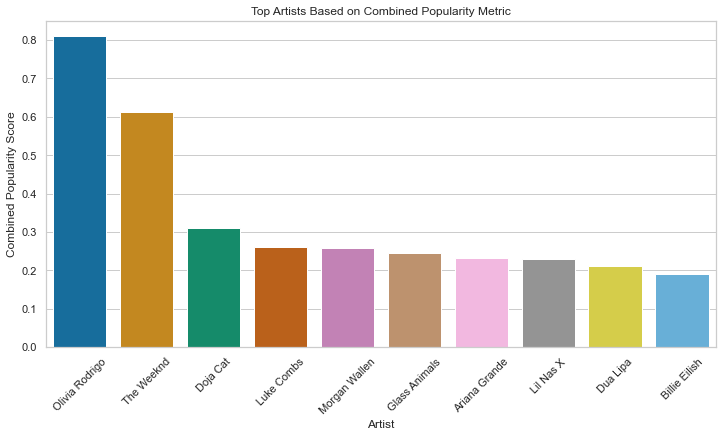

In [344]:
# Combined metric example: (Normalized Spotify Streams + Normalized Billboard Weeks) / 2
combined_df['Combined_Popularity'] = (combined_df['Spotify_Total_Streams'] / combined_df['Spotify_Total_Streams'].max() + 
                                        combined_df['Billboard_Total_Weeks'] / combined_df['Billboard_Total_Weeks'].max()) / 2

# Selecting top artists for visualization
top_combined_artists = combined_df.nlargest(10, 'Combined_Popularity')

plt.figure(figsize=(12, 6))
sns.barplot(x='artist_names', y='Combined_Popularity', data=top_combined_artists)
plt.xticks(rotation=45)
plt.title('Top Artists Based on Combined Popularity Metric')
plt.xlabel('Artist')
plt.ylabel('Combined Popularity Score')
plt.show()

This combined popularity metric provides a more holistic view of an artist's popularity than looking at either Spotify streams or Billboard chart presence alone. The combined popularity scores seem to have a quick drop-off after the first few artists, indicating a significant difference in combined popularity between the top-ranked artists and those ranked lower. Olivia Rodrigo's score is notably higher than the others, suggesting her dominance across both streaming and chart presence during the measured period.

#### 6. Create a Bubble Chart to Compare Artist Popularity on Spotify vs Billboard

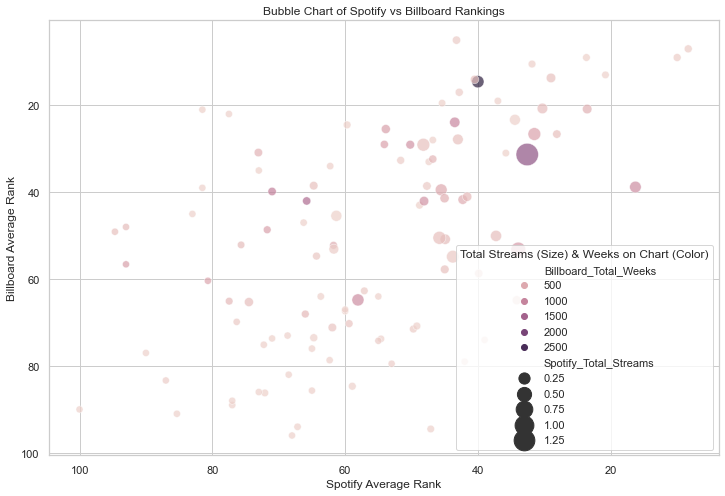

In [368]:
# Creat a Bubble Chart with Color Dimension and the size of the bubble represents either the total streams or total weeks on the chart.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=combined_df, x='Spotify_Avg_Rank', y='Billboard_Avg_Rank', 
                size='Spotify_Total_Streams', hue='Billboard_Total_Weeks', 
                sizes=(50, 500), alpha=0.7)
plt.title('Bubble Chart of Spotify vs Billboard Rankings')
plt.xlabel('Spotify Average Rank')
plt.ylabel('Billboard Average Rank')
plt.gca().invert_xaxis() # Inverting X-axis
plt.gca().invert_yaxis() # Inverting Y-axis
plt.legend(title='Total Streams (Size) & Weeks on Chart (Color)')
plt.show()

Each bubble represents an artist or a song, with its position indicating the average rank on Spotify and Billboard. The size of the bubble indicates the total number of streams on Spotify, with larger bubbles representing more streams. The color of the bubble corresponds to how long the song has been on the Billboard chart, with darker colors likely indicating longer periods. Some songs or artists with a high number of streams on Spotify (large bubbles) do not necessarily have a long presence on the Billboard chart (lighter colored bubbles), indicating possible differences in platform audience or song longevity. Conversely, some songs or artists with longer Billboard chart presence (darker bubbles) do not always correspond to high streaming numbers on Spotify (small bubbles), which might suggest different audience demographics or consumption patterns between the two platforms.

<font color='green'> Tips for Effective Visualization: Try to adjust the sizes parameter to ensure that bubbles are distinct and visually informative, and adjust the alpha parameter to make the chart more readable, especially if bubbles overlap.

In [219]:
!pip install matplotlib-venn

#### 7. Create a Heatmap of Artist Presence on Spotify and Billboard Charts

In [383]:
# Rename rank columns for clarity
spotify_df.rename(columns={'rank': 'rank_spotify'}, inplace=True)
billboard_df.rename(columns={'rank': 'rank_billboard'}, inplace=True)

# Print column names to verify the changes
print("Spotify DataFrame columns:", spotify_df.columns)
print("Billboard DataFrame columns:", billboard_df.columns)

# Merge datasets on artist and song
combined_df = pd.merge(spotify_df, billboard_df, on=['artist', 'song'], how='outer')

# Print column names of the combined DataFrame
print("Combined DataFrame columns:", combined_df.columns)

Spotify DataFrame columns: Index(['song', 'artist', 'date', 'rank_spotify', 'weeks_on_charts',
       'peak_rank', 'streams'],
      dtype='object')
Billboard DataFrame columns: Index(['song', 'artist', 'date', 'rank_billboard', 'weeks_on_charts',
       'peak_rank'],
      dtype='object')
Combined DataFrame columns: Index(['song', 'artist', 'date_x', 'rank_spotify', 'weeks_on_charts_x',
       'peak_rank_x', 'streams', 'date_y', 'rank_billboard',
       'weeks_on_charts_y', 'peak_rank_y'],
      dtype='object')


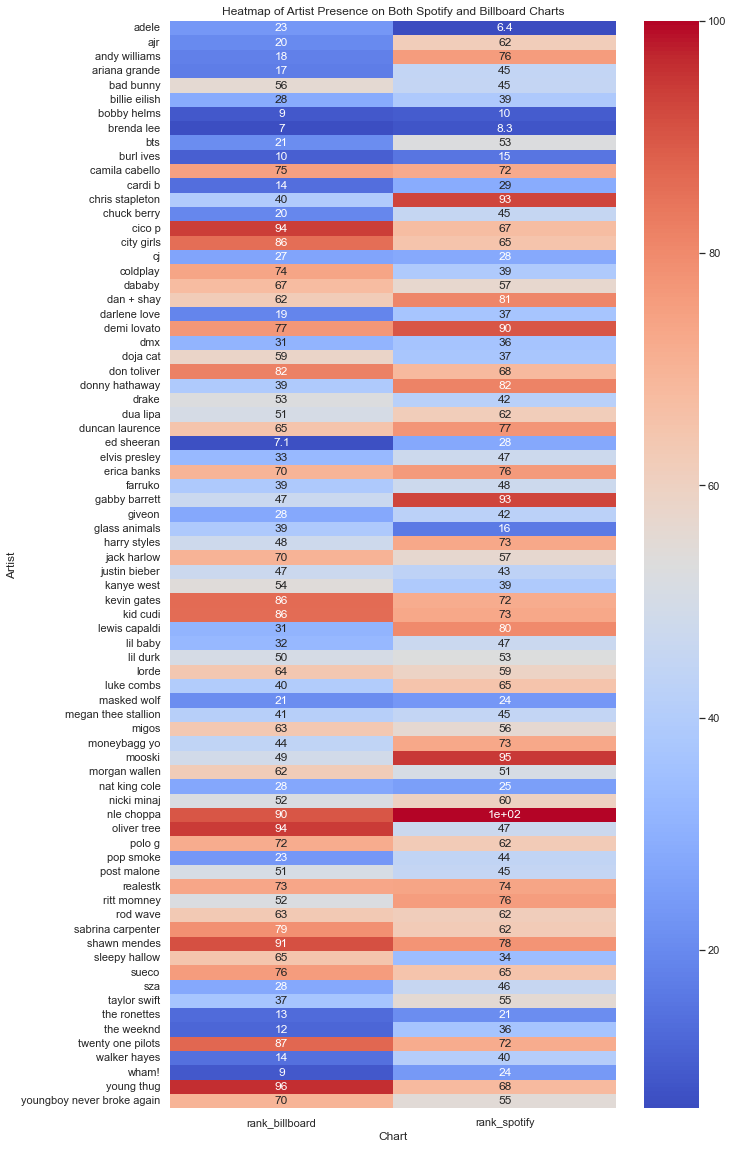

In [384]:
# Filter out rows where either 'rank_spotify' or 'rank_billboard' is NaN, ensure we only analyze artists who have rankings on both platforms
filtered_df = combined_df.dropna(subset=['rank_spotify', 'rank_billboard'])

# Create a pivot table with the filtered data
artist_pivot = filtered_df.pivot_table(index='artist', 
                                       values=['rank_spotify', 'rank_billboard'], 
                                       aggfunc='mean')

# Fill any NaN values, if necessary (should be minimal or none after filtering)
artist_pivot.fillna(0, inplace=True)

# Plot the heatmap with an adjusted figure size
plt.figure(figsize=(10, 20))  # Adjust the size as needed based on the number of artists
sns.heatmap(artist_pivot, annot=True, cmap='coolwarm')
plt.title('Heatmap of Artist Presence on Both Spotify and Billboard Charts')
plt.xlabel('Chart')
plt.ylabel('Artist')
plt.show()

The overall distribution of colors across the heatmap gives a visual representation of how artists compare overall on the two platforms. The intensity of the color correlates with the rank's value. Darker reds indicate a higher rank (closer to 1), and darker blues suggest a lower rank (further away from 1). By comparing the color intensities for each artist across both platforms, stakeholders can determine where an artist is more popular or has a better ranking. For instance, "ariana grande" has relatively balanced rankings, but "cardi b" has a significantly higher ranking on Billboard compared to Spotify.  In addition, "adele" has an average rank of 23 on Spotify and 6.4 on Billboard, indicating a better average position on Billboard charts. This could suggest that Adele's music might be more popular or better promoted on Billboard compared to Spotify.